In [1]:
!unzip "/content/drive/My Drive/Stock Prices.zip" -d "/content/Stock Prices/"

Archive:  /content/drive/My Drive/Stock Prices.zip
  inflating: /content/Stock Prices/AABA_2006-01-01_to_2018-01-01.csv  
  inflating: /content/Stock Prices/AAPL_2006-01-01_to_2018-01-01.csv  
  inflating: /content/Stock Prices/AMZN_2006-01-01_to_2018-01-01.csv  
  inflating: /content/Stock Prices/AXP_2006-01-01_to_2018-01-01.csv  
  inflating: /content/Stock Prices/BA_2006-01-01_to_2018-01-01.csv  
  inflating: /content/Stock Prices/CAT_2006-01-01_to_2018-01-01.csv  
  inflating: /content/Stock Prices/CSCO_2006-01-01_to_2018-01-01.csv  
  inflating: /content/Stock Prices/CVX_2006-01-01_to_2018-01-01.csv  
  inflating: /content/Stock Prices/DIS_2006-01-01_to_2018-01-01.csv  
  inflating: /content/Stock Prices/GE_2006-01-01_to_2018-01-01.csv  
  inflating: /content/Stock Prices/GOOGL_2006-01-01_to_2018-01-01.csv  
  inflating: /content/Stock Prices/GS_2006-01-01_to_2018-01-01.csv  
  inflating: /content/Stock Prices/HD_2006-01-01_to_2018-01-01.csv  
  inflating: /content/Stock Prices/IB

Load the Data

In [1]:
import pandas as pd

df = pd.read_csv("/content/Stock Prices/AAPL_2006-01-01_to_2018-01-01.csv", parse_dates=["Date"])

df.drop(columns = ["Name"], inplace = True)

df

,Date,Open,High,Low,Close,Volume
0,2006-01-03,10.34,10.68,10.32,10.68,201853036
1,2006-01-04,10.73,10.85,10.64,10.71,155225609
2,2006-01-05,10.69,10.70,10.54,10.63,112396081
3,2006-01-06,10.75,10.96,10.65,10.90,176139334
4,2006-01-09,10.96,11.03,10.82,10.86,168861224
...,...,...,...,...,...,...
3014,2017-12-22,174.68,175.42,174.50,175.01,16349444
3015,2017-12-26,170.80,171.47,169.68,170.57,33185536
3016,2017-12-27,170.10,170.78,169.71,170.60,21498213
3017,2017-12-28,171.00,171.85,170.48,171.08,16480187


# Data Visualisation

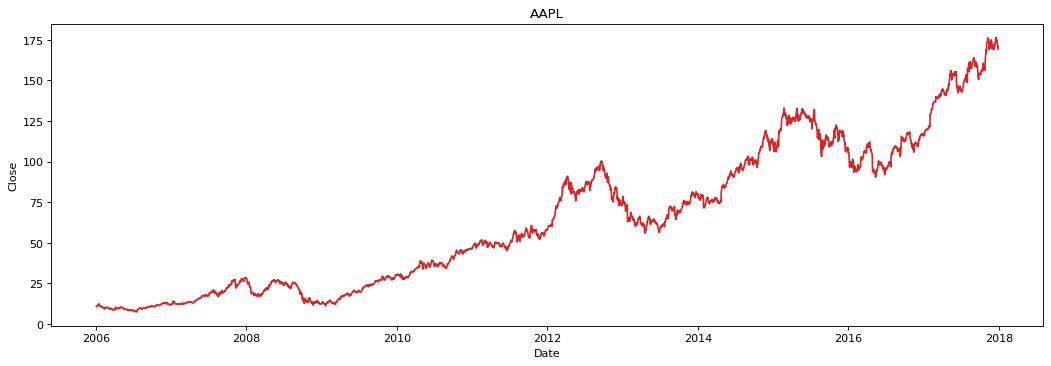

In [2]:
import matplotlib.pyplot as plt

x = df.Date

y = df.Close

plt.figure(figsize=(16,5), dpi = 80)

plt.plot(x, y, color='tab:red')

plt.gca().set(title = "AAPL", xlabel = "Date", ylabel = "Close")

plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


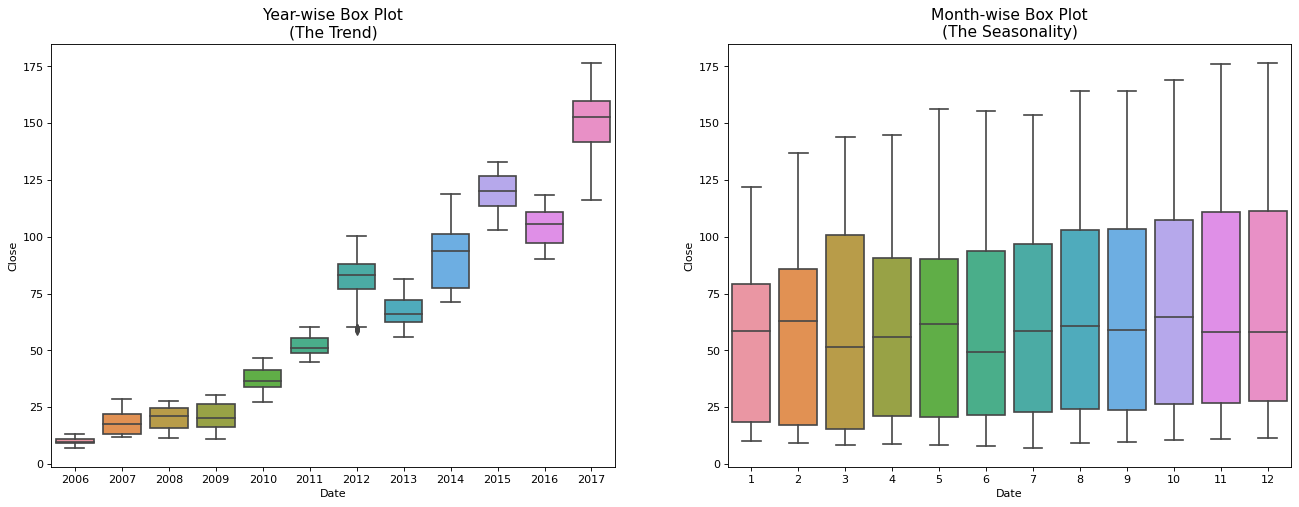

In [3]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)

# Yearly Boxplot

sns.boxplot(x = df.Date.dt.year, y='Close', data=df, ax=axes[0])

# Monthly Boxplot

sns.boxplot(x = df.Date.dt.month, y='Close', data=df)

# Set Titles

axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=14); 

axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=14)

plt.show()

Decomposition

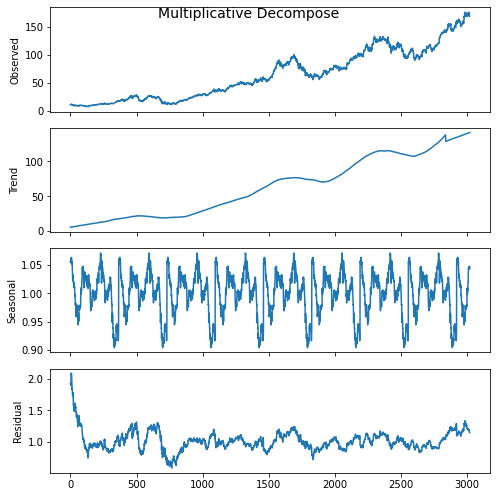

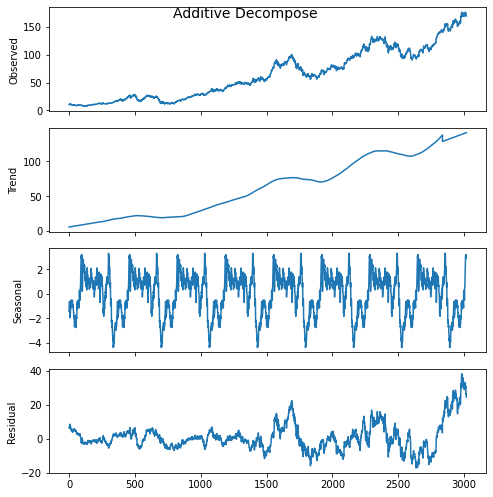

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition 

result_mul = seasonal_decompose(y, model='multiplicative', extrapolate_trend='freq', freq=365)

# Additive Decomposition

result_add = seasonal_decompose(y, model='additive', extrapolate_trend='freq', freq=365)

# Plot

plt.rcParams.update({'figure.figsize': (7,7)})

result_mul.plot().suptitle('Multiplicative Decompose', fontsize=14)

result_add.plot().suptitle('Additive Decompose', fontsize=14)

plt.show()

Check Stationarity

In [5]:
from statsmodels.tsa.stattools import adfuller

stats = adfuller(y.values, autolag='AIC')

output = pd.Series(stats[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])


for key,value in stats[4].items():
    
    output['Critical Value (%s)'%key] = value


print ('Results of Dickey-Fuller Test:')
    
print (output)

Results of Dickey-Fuller Test:
Test Statistic                    0.552367
p-value                           0.986381
#Lags Used                       22.000000
Number of Observations Used    2996.000000
Critical Value (1%)              -3.432535
Critical Value (5%)              -2.862505
Critical Value (10%)             -2.567284
dtype: float64


# Prophet Approach

In [6]:
# closing price for y and date for ds

train_data = pd.DataFrame()

train_data['ds'] = x.values

train_data['y'] = y.values

train_data.head()

,ds,y
0,2006-01-03,10.68
1,2006-01-04,10.71
2,2006-01-05,10.63
3,2006-01-06,10.90
4,2006-01-09,10.86


In [7]:
# Split Train-Val into 80-20

val_data = train_data[-round(len(train_data)*0.2):]

train_data = train_data[:-len(val_data)]

print(len(train_data), len(val_data))

2415 604


Train the Model

In [8]:
from fbprophet import Prophet

model = Prophet()

model.fit(train_data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Prediction

In [9]:
#predictions
future_prices = model.make_future_dataframe(periods=len(val_data))

forecast = model.predict(future_prices)

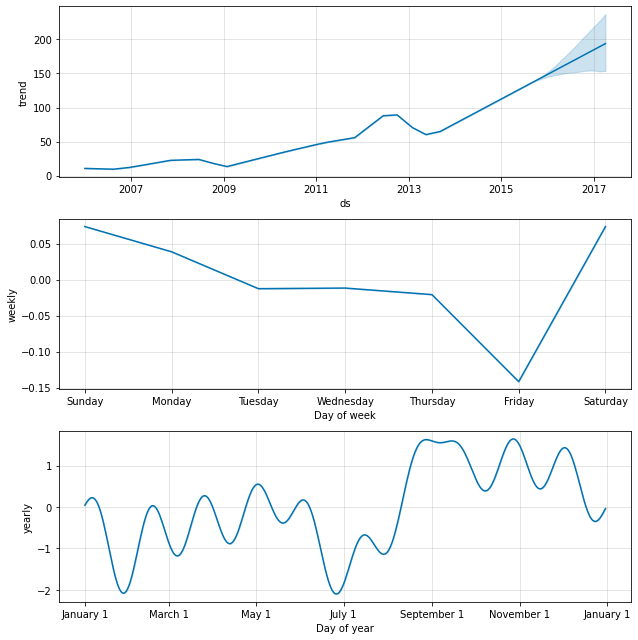

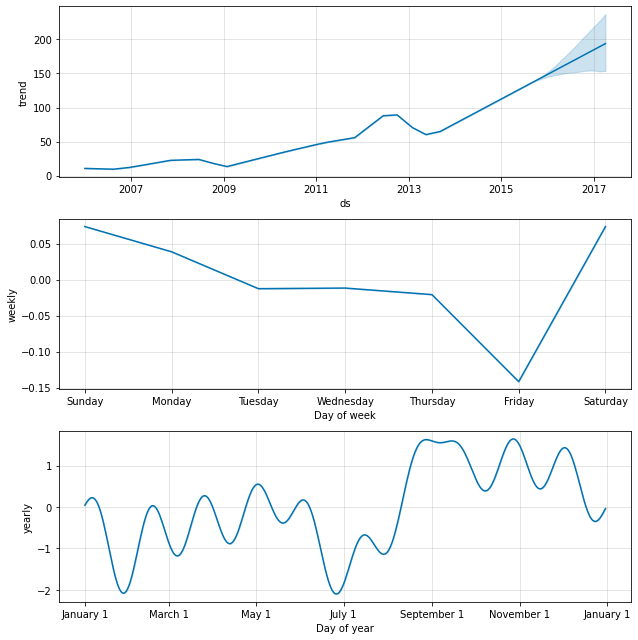

In [10]:
model.plot_components(forecast)

Evaluation

In [11]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-01-03,10.466354,5.999298,15.060784,10.466354,10.466354,0.126346,0.126346,0.126346,-0.012463,-0.012463,-0.012463,0.138809,0.138809,0.138809,0.0,0.0,0.0,10.592700
1,2006-01-04,10.460891,6.114113,15.167509,10.460891,10.460891,0.169492,0.169492,0.169492,-0.011616,-0.011616,-0.011616,0.181109,0.181109,0.181109,0.0,0.0,0.0,10.630383
2,2006-01-05,10.455427,6.186458,14.974115,10.455427,10.455427,0.189635,0.189635,0.189635,-0.020687,-0.020687,-0.020687,0.210323,0.210323,0.210323,0.0,0.0,0.0,10.645063
3,2006-01-06,10.449964,6.436870,15.442989,10.449964,10.449964,0.082496,0.082496,0.082496,-0.141596,-0.141596,-0.141596,0.224092,0.224092,0.224092,0.0,0.0,0.0,10.532460
4,2006-01-09,10.433574,5.869540,14.975089,10.433574,10.433574,0.194644,0.194644,0.194644,0.038763,0.038763,0.038763,0.155881,0.155881,0.155881,0.0,0.0,0.0,10.628218


In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

#rmse
forecast_valid = forecast.loc[len(train_data):,'yhat']

rms = sqrt(mean_squared_error(forecast_valid, val_data['y']))

rms

41.03035938931178

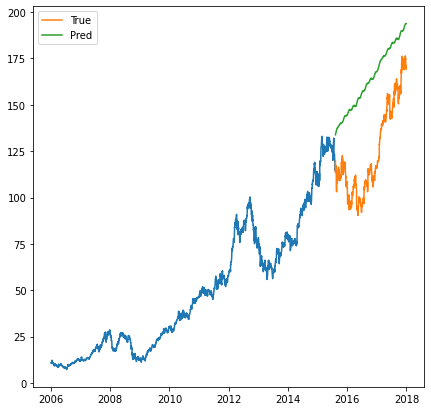

In [13]:
#plot
val_data['Predictions'] = 0
val_data['Predictions'] = forecast_valid.values

plt.plot(train_data['ds'], train_data['y'])
plt.plot(val_data['ds'], val_data['y'], label = "True")
plt.plot(val_data['ds'], val_data['Predictions'], label = "Pred")

plt.legend()
plt.show()

# LTSM Approach

In [14]:
df_new = pd.read_csv("/content/Stock Prices/AAPL_2006-01-01_to_2018-01-01.csv", parse_dates=["Date"], index_col=['Date'])

df_new.drop(columns = ["Name"], inplace = True)

df_new

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036
2006-01-04,10.73,10.85,10.64,10.71,155225609
2006-01-05,10.69,10.70,10.54,10.63,112396081
2006-01-06,10.75,10.96,10.65,10.90,176139334
2006-01-09,10.96,11.03,10.82,10.86,168861224
...,...,...,...,...,...
2017-12-22,174.68,175.42,174.50,175.01,16349444
2017-12-26,170.80,171.47,169.68,170.57,33185536
2017-12-27,170.10,170.78,169.71,170.60,21498213


In [15]:
train_set = df_new.loc[:'2016','Close'].values # 2006 to 2016
test_set = df_new.loc['2017':,'Close'].values # 2017

print(train_set.shape, test_set.shape)

(2768,) (251,)


Normalise the Data

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

train_set_norm = scaler.fit_transform(train_set.reshape(-1,1))

train_set_norm

array([[0.02735369],
       [0.02759224],
       [0.02695611],
       ...,
       [0.87086514],
       [0.87062659],
       [0.86339059]])

Creating Moving Window

In [17]:
X_train = []
y_train = []

observ = 60 #Number of observations to base your prediction on

for i in range(observ, len(train_set_norm)):
  X_train.append(train_set_norm[i-observ:i])
  y_train.extend(train_set_norm[i])

X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train.shape, y_train.shape)

(2708, 60, 1) (2708,)


In [18]:
total_test = df_new['Close'][-(len(test_set) + observ):].values # use the last 60 days of train to predict 1st day of test

test_set_norm = scaler.fit_transform(total_test.reshape(-1,1))

test_set_norm.shape

(311, 1)

In [19]:
X_test = []
y_test = []

for i in range(observ, len(test_set_norm)):
  X_test.append(test_set_norm[i-observ:i])
  y_test.extend(test_set_norm[i])

X_test, y_test = np.array(X_test), np.array(y_test)

print(X_test.shape, y_test.shape)

(251, 60, 1) (251,)


Define Model

In [35]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras import optimizers

lstm_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = LSTM(50)(lstm_input)
x = Dropout(0.2)(x)
x = Dense(64)(x)
x = Activation('sigmoid')(x)
x = Dense(1)(x)

output = Activation('linear')(x)

model = Model(inputs=lstm_input, outputs=output)

model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 60, 1)]           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                3264      
_________________________________________________________________
activation_6 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_7 (Activation)    (None, 1)                

In [36]:
model.compile(loss='mse', optimizer='adam')

Train Model

In [37]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=72,
                    validation_data=(X_test, y_test),
                    verbose=2,
                    shuffle=False)

Epoch 1/30
38/38 - 1s - loss: 0.4073 - val_loss: 0.0497
Epoch 2/30
38/38 - 1s - loss: 0.1761 - val_loss: 0.0483
Epoch 3/30
38/38 - 1s - loss: 0.0789 - val_loss: 0.0269
Epoch 4/30
38/38 - 1s - loss: 0.0563 - val_loss: 0.0035
Epoch 5/30
38/38 - 1s - loss: 0.0232 - val_loss: 0.0205
Epoch 6/30
38/38 - 1s - loss: 0.0042 - val_loss: 0.0049
Epoch 7/30
38/38 - 1s - loss: 0.0020 - val_loss: 0.0028
Epoch 8/30
38/38 - 1s - loss: 0.0024 - val_loss: 0.0032
Epoch 9/30
38/38 - 1s - loss: 0.0017 - val_loss: 0.0031
Epoch 10/30
38/38 - 1s - loss: 0.0018 - val_loss: 0.0030
Epoch 11/30
38/38 - 1s - loss: 0.0018 - val_loss: 0.0032
Epoch 12/30
38/38 - 1s - loss: 0.0016 - val_loss: 0.0029
Epoch 13/30
38/38 - 1s - loss: 0.0017 - val_loss: 0.0028
Epoch 14/30
38/38 - 1s - loss: 0.0017 - val_loss: 0.0029
Epoch 15/30
38/38 - 1s - loss: 0.0016 - val_loss: 0.0028
Epoch 16/30
38/38 - 1s - loss: 0.0016 - val_loss: 0.0027
Epoch 17/30
38/38 - 1s - loss: 0.0015 - val_loss: 0.0028
Epoch 18/30
38/38 - 1s - loss: 0.0015 - 

Visualisation

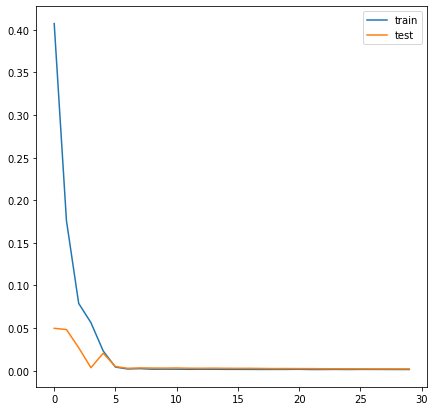

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.show()

Evaluation

In [50]:
y_pred = model.predict(X_test)

In [51]:
y_pred = scaler.inverse_transform(y_pred)

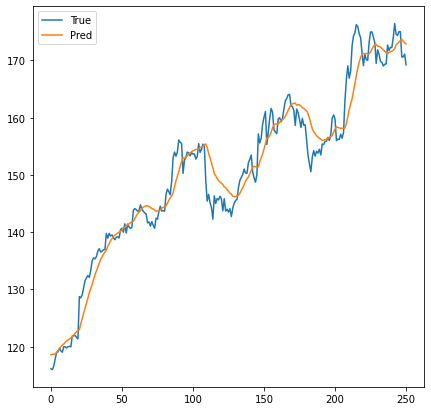

In [54]:
plt.plot(test_set, label = "True")
plt.plot(y_pred, label = "Pred")

plt.legend()
plt.show()

References:

*  https://www.machinelearningplus.com/time-series/time-series-analysis-python/

*  https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

*  https://medium.com/swlh/predicting-stock-prices-using-deep-learning-models-310b41cec90a

*  https://www.kaggle.com/robikscube/tutorial-time-series-forecasting-with-xgboost

*  https://stackabuse.com/time-series-analysis-with-lstm-using-pythons-keras-library/

*  https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

Add Technical Indicators

*  https://towardsdatascience.com/getting-rich-quick-with-machine-learning-and-stock-market-predictions-696802da94fe
